# Imports

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats.api as sms

# Importing housing data

In [2]:
# import housing data
housing_df = pd.read_excel("House Prices.xlsx")
housing_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# drop 'No' column
housing_df = housing_df.drop('No', axis=1)
housing_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# Bootstrap code setup

In [4]:
# split dataframe into features and labels
def split_df(df):
    X = df.drop('Y house price of unit area', axis=1)
    y = df['Y house price of unit area']
    return X,y

In [5]:
# perdorms linear regression and returns the intercept value
def get_intercept(X,y):
    model = LinearRegression()
    model.fit(X,y)
    return model.intercept_

In [6]:
# performs bootstrapping process and returns list of values
def preform_bootstrap(df, nboots, func):
    ints = []
    
    for i in range(nboots):
        index = np.random.randint(0, len(df), len(df))
        boot_df = df.iloc[index]
        X,y = split_df(boot_df)
        intercept = func(X,y)
        ints.append(intercept)
    
    return ints

# Perform bootstrap and visualization

In [7]:
nboots = 1000 # number of bootstrap samples
intercept_boot_values = preform_bootstrap(housing_df, nboots, get_intercept)

In [8]:
# print mean and standard deviation
print(np.mean(intercept_boot_values))
print(np.std(intercept_boot_values, ddof=1)) # ddof=1 since we the mean is used in the calculation

-14822.38744014081
5755.341200358305


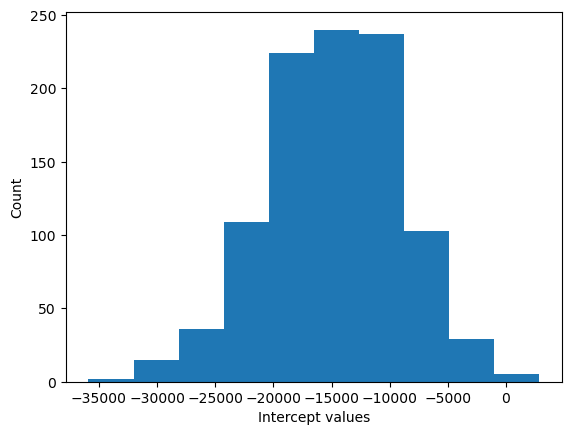

In [13]:
# visualize the results
plt.hist(intercept_boot_values)
plt.xlabel('Intercept values')
plt.ylabel('Count')
plt.savefig('hist.png', bbox_inches='tight')
plt.show()

In [18]:
# calculate 95% confidence interval
conf_int_95 = st.norm.interval(0.95, loc=np.mean(intercept_boot_values), scale=st.sem(intercept_boot_values))
conf_int_95

(-15179.100628660795, -14465.674251620825)